In [1]:
import pandas as pd
train= pd.read_csv('./nlp/tweets.csv', sep='^([^,]+),', engine='python', error_bad_lines=False, encoding='utf-8', index_col=[0])

In [2]:
train = train.reset_index(drop=True)

In [3]:
train['polarity'] = train['polarity'].str.replace("0","negatif").str.replace("4","positif")

In [4]:
index_zero = train[(train['polarity'] != 'positif') & (train['polarity']!= 'negatif')].index

In [5]:
train.drop(index_zero, inplace=True)

In [6]:
train = train.sample(n=100000)

In [7]:
def clean_up(s):
    import re
    s= re.sub(r'http\S+|(www\.[^\s]+)|(@\S+)',' ',s)
    s=re.sub('[\d]',' ',s)
    s= re.sub('[^\w\s]',' ',s)
    s= re.sub('\s\s+',' ',s)
    s=s.lower().strip()
    return s
def tokenize(s):
    from nltk.tokenize import word_tokenize
    return word_tokenize(s)
def stem(tweet):
    from nltk.stem.snowball import FrenchStemmer
    stemmer = FrenchStemmer()
    return list(map(lambda s: stemmer.stem(s), tweet))
def remove_stopwords(l):
    from nltk.corpus import stopwords
    stop_words = stopwords.words('french')
    stop_words.append('rt')
    return [x for x in l if x not in stop_words]
train.statutnull=train.statutnull.astype(str)

In [8]:
train.statutnull = train.statutnull.apply(lambda s: clean_up(s))

In [9]:
train.statutnull = train.statutnull.apply(lambda s: tokenize(s))

In [10]:
train.statutnull = train.statutnull.apply(lambda s: stem(s))

In [11]:
train.statutnull = train.statutnull.apply(lambda s: remove_stopwords(s))

In [12]:
train.rename(columns={'statutnull':'tweet'},inplace=True)

In [19]:
train.head()

,polarity,tweet
1094704,positif,"[donc, chang, mis, pag, aim, chang, ça, a, bea..."
1043820,positif,"[bonjour, dan, mond, enti, cet, form, funsl, o..."
338276,negatif,"[picanic, basket, aawwwww]"
960418,positif,"[observ, amus, notr, pass, temp]"
542544,negatif,"[incroi, puiss, travaill, ensembl, félicit, cu..."


(-0.5, 799.5, 499.5, -0.5)

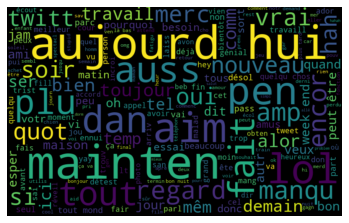

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text= ' '.join([x for text in train.tweet for x in text])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110).generate(all_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [14]:
all_words = []
import nltk
NUM_FEATURES = 5000
for index, value in train.tweet.iteritems():
    if value not in all_words:
        all_words += value

top_features = [x[0] for x in nltk.FreqDist(all_words).most_common(NUM_FEATURES)]

In [15]:
def build_features(words):
    features = {}
    for w in top_features:
        features[w] = (w in words)
    return features

In [16]:
featuresets = []

for index, row in train.iterrows():
    featuresets.append((build_features(row['tweet']), row['polarity']))

In [17]:
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
train_set, test = train_test_split(featuresets, test_size=0.2)
classifier = NaiveBayesClassifier.train(train_set)

In [18]:
nltk.classify.accuracy(classifier, test)

0.7399